In [1]:
from manim import *
from scipy.optimize import fsolve
import numpy as np
import random

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.18.0

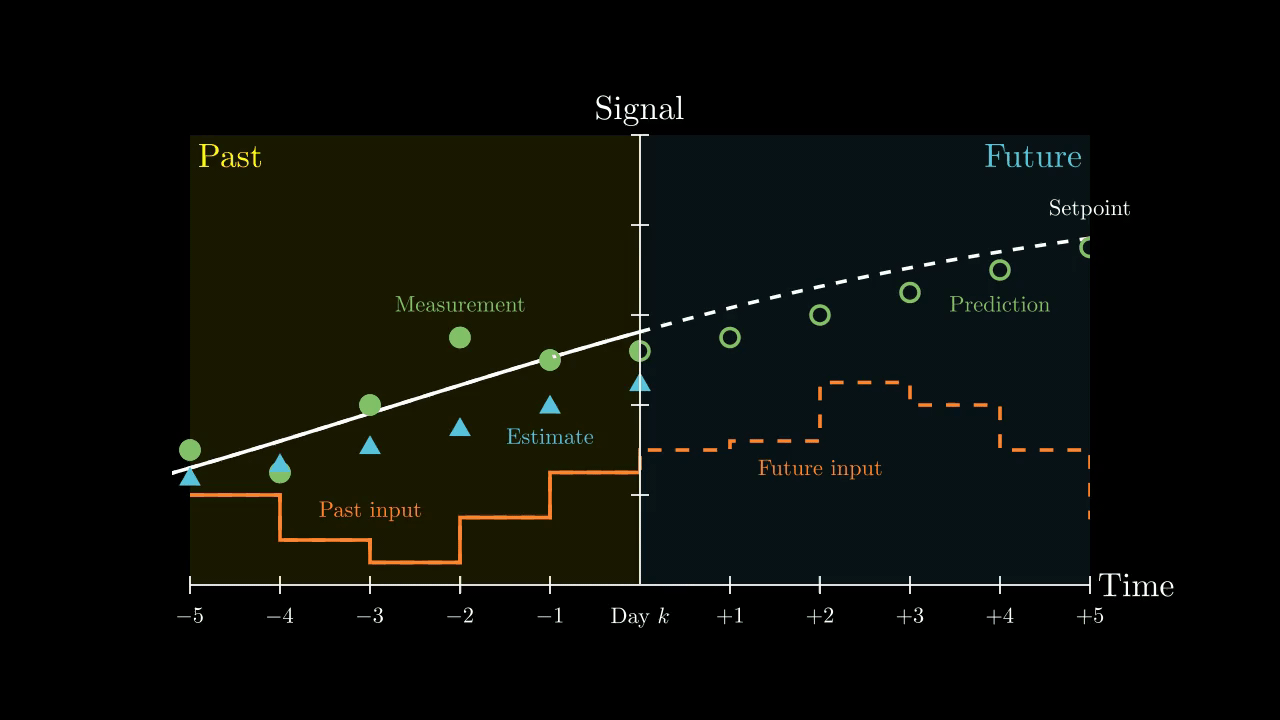

In [392]:
%%manim -qm --format=gif mpc

class mpc(Scene):

    def construct(self):

        # Create x and y axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 5, 1],
            x_length=10,
            y_length=5,
            tips=False,
            axis_config={"include_numbers": False},
        )
        y_label = Tex("Signal", color=WHITE).scale(0.75)    
        y_label.next_to(axes.y_axis, UP, buff=0.1)
        x_label = Tex("Time", color=WHITE).scale(0.75)    
        x_label.next_to(axes.x_axis, RIGHT, buff=0.1)

        # Text x-labels
        x_labels_array = [
            "$-5$","$-4$","$-3$","$-2$","$-1$","Day $k$",
            "$+1$","$+2$","$+3$","$+4$","$+5$","$+6$"]
        x_labels = VGroup()
        for x_val, label_text in zip(range(-5, 7), x_labels_array):
            label = Tex(label_text).scale(0.5)  # You can customize the scale
            label.next_to(axes.coords_to_point(x_val, 0), DOWN)
            x_labels.add(label)

        # Past and future quadrants
        past = Rectangle(
            height=5,
            width=5,
            stroke_opacity=0,  # No border
            fill_opacity=0.1,  # Transparency level
            fill_color=YELLOW,  # Rectangle color
        ).move_to(axes.c2p(-2.5,2.5))   
        past_text = Tex("Past", color=YELLOW).scale(0.75)
        past_text.next_to(past.get_corner(UL), DOWN+RIGHT,buff=0.1)

        future = Rectangle(
            height=5,
            width=5,
            stroke_opacity=0,  # No border
            fill_opacity=0.1,  # Transparency level
            fill_color=BLUE,  # Rectangle color
        ).move_to(axes.c2p(2.5,2.5))   
        future_text = Tex("Future", color=BLUE).scale(0.75)
        future_text.next_to(future.get_corner(UR), DOWN+LEFT,buff=0.1)     

        # Subtitle function
        def caption(new_text,new_color):
            return Tex(new_text, color=new_color).next_to(axes, DOWN, buff=0.5).scale(1)

        # Use black rectangles to create "clipping" effects of curves/dots
        mask_left_out = Rectangle(height=5,width=2,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(-6.2,2.5))
        mask_right_out = Rectangle(height=5,width=2,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(6,2.5))
        mask_right_in = Rectangle(height=5,width=5,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(2.5,2.5))
        mask_left_tick = Rectangle(height=1,width=2,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(-6.2,-0.5))    
        mask_right_tick = Rectangle(height=1,width=2,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(6.2,-0.5))    

        # Setpoint curve
        setpoint_curve = ParametricFunction(lambda t: [t, 10 / (2 + np.exp(-0.25*t)), 0], t_range=[-6, 6], color=WHITE).move_to(axes.coords_to_point(0,2.5))  
        dashed_setpoint = DashedVMobject(setpoint_curve,num_dashes=50)

        # State coordinates        
        initial_state_coor = [(-5, 1.2), (-4, 1.35), (-3, 1.55), (-2, 1.75), (-1, 2), (0,2.25)]
        new_state_coor = [(-5, 1.35), (-4, 1.55), (-3, 1.85), (-2, 2.15), (-1, 2.45), (0,2.9)]
        
        # State objects
        initial_states = VGroup(*[Triangle(color=BLUE,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in initial_state_coor])
        new_states = VGroup(*[Triangle(color=BLUE,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in new_state_coor])
        
        # Output coordinates
        initial_output_coor = [(-5, 1.5), (-4, 1.25), (-3, 2), (-2, 2.75), (-1, 2.5), (0,2.6), (1,2.75), (2,3), (3,3.25), (4,3.5), (5,3.75), (6,3.85)]
        predicted_output_coor = [(-5, 1.5), (-4, 1.25), (-3, 2), (-2, 2.75), (-1, 2.5), (0,2.9), (1,3), (2,3.1), (3,3.25), (4,3.35), (5,3.55), (6,3.85)]
        optimized_output_coor = [(-5, 1.5), (-4, 1.25), (-3, 2), (-2, 2.75), (-1, 2.5), (0,2.9),(1,3), (2,3.3), (3,3.5), (4,3.65), (5,3.75), (6,3.85)]

        # Output objects (initial, predicted, optimized)
        initial_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in initial_output_coor])
        dashed_initial_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=0,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in initial_output_coor])
        
        predicted_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in predicted_output_coor])
        dashed_predicted_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=0,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in predicted_output_coor])

        optimized_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in optimized_output_coor])
        dashed_optimized_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=0,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in optimized_output_coor])

        # Input coordinates
        initial_input_coor = [
            (-5,1),(-4,1),(-4,0.5),(-3,0.5),(-3,0.25),(-2,0.25),(-2,0.75),(-1,0.75),(-1,1.25),(0,1.25),
            (0,1.5),(1,1.5),(1,1.6),(2,1.6),(2,2.25),(3,2.25),(3,2),(4,2),(4,1.5),(5,1.5),(5,0.75),(6,0.75)]
        new_input_coor = [
            (-5,1),(-4,1),(-4,0.5),(-3,0.5),(-3,0.25),(-2,0.25),(-2,0.75),(-1,0.75),(-1,1.25),(0,1.25),
            (0,1.5),(1,1.5),(1,2),(2,2),(2,2.25),(3,2.25),(3,1.75),(4,1.75),(4,1.5),(5,1.5),(5,0.5),(6,0.5)]
        
        # Input objects
        initial_inputs = VMobject(color=ORANGE)
        initial_inputs.set_points_as_corners([axes.coords_to_point(coord[0],coord[1]) for coord in initial_input_coor])
        dashed_initial_inputs = DashedVMobject(initial_inputs,num_dashes=50)
        new_inputs = VMobject(color=ORANGE)
        new_inputs.set_points_as_corners([axes.coords_to_point(coord[0],coord[1]) for coord in new_input_coor])
        dashed_new_inputs = DashedVMobject(new_inputs,num_dashes=50)

        # Data labels and label group
        label_sp = Tex("Setpoint",color=WHITE).next_to(axes.coords_to_point(5,3.85), UP,buff=0.1).scale(0.5)
        label_meas = Tex("Measurement",color=GREEN).next_to(initial_outputs[3], UP,buff=0.1).scale(0.5)
        label_est = Tex("Estimate",color=BLUE).next_to(initial_states[4], DOWN,buff=0.1).scale(0.5)
        label_pred = Tex("Prediction",color=GREEN).next_to(initial_outputs[-3], DOWN,buff=0.1).scale(0.5)
        label_input_1 = Tex("Past input",color=ORANGE).next_to(axes.coords_to_point(initial_input_coor[3][0],initial_input_coor[3][1]), UP,buff=0.1).scale(0.5)
        label_input_2 = Tex("Future input",color=ORANGE).next_to(axes.coords_to_point(initial_input_coor[-9][0],initial_input_coor[-9][1]), DOWN,buff=0.1).scale(0.5)
        all_labels = VGroup(label_sp,label_meas,label_est,label_pred,label_input_1,label_input_2)
        
        # Place objects and masks (order matters)
        self.add(past,past_text)
        self.add(setpoint_curve,initial_inputs,initial_outputs)
        self.add(mask_right_in)
        self.add(future,future_text)
        self.add(dashed_setpoint,dashed_initial_inputs,dashed_initial_outputs,initial_states)
        self.add(mask_left_out,mask_right_out)
        self.add(x_labels)
        self.add(mask_left_tick,mask_right_tick)
        self.add(axes, x_label,y_label)
        self.add(all_labels)

        # Step 1
        self.wait(1)
        initial_caption = caption("Data on Day $k$",WHITE)
        self.play(Create(initial_caption))
        self.play(Circumscribe(all_labels[0], color=WHITE),Circumscribe(all_labels[1], color=GREEN),Circumscribe(all_labels[4], color=ORANGE))

        # Step 2
        self.wait(2)
        estimate_caption = caption("State estimation",BLUE)
        self.play(Uncreate(initial_caption),Create(estimate_caption))
        self.play(Circumscribe(all_labels[2], color=BLUE))
        self.play(
            Transform(initial_states,new_states),
            all_labels[2].animate.next_to(new_states[4], DOWN,buff=0.1),
            )

        # Step 3
        self.wait(2)
        predict_caption = caption("Model prediction",GREEN)
        self.play(Uncreate(estimate_caption),Create(predict_caption))
        self.play(Circumscribe(all_labels[3], color=GREEN))    
        self.play(
            Transform(initial_outputs,predicted_outputs),Transform(dashed_initial_outputs,dashed_predicted_outputs),
            all_labels[3].animate.next_to(predicted_outputs[-3], DOWN,buff=0.1)
            )
        
        # Step 4
        self.wait(2)
        optimize_caption = caption("Optimization",ORANGE)
        self.play(Uncreate(predict_caption),Create(optimize_caption))
        self.play(Circumscribe(all_labels[3], color=GREEN),Circumscribe(all_labels[5], color=ORANGE))    
        self.play(
            Transform(initial_inputs,new_inputs),Transform(dashed_initial_inputs,dashed_new_inputs),
            Transform(initial_outputs,optimized_outputs),Transform(dashed_initial_outputs,dashed_optimized_outputs),
            all_labels[5].animate.next_to(axes.coords_to_point(new_input_coor[-9][0],new_input_coor[-9][1]), DOWN,buff=0.1),
            all_labels[3].animate.next_to(optimized_outputs[-3], DOWN,buff=0.1)
            )
        
        # Step 5
        self.wait(2)
        next_day_caption = caption("Repeat on Day $k+1$",WHITE)
        self.play(Uncreate(optimize_caption),Create(next_day_caption))
        self.play(
            x_labels.animate.shift(1 * LEFT),
            dashed_setpoint.animate.shift(1 * LEFT),setpoint_curve.animate.shift(1 * LEFT),
            initial_outputs.animate.shift(1 * LEFT),dashed_initial_outputs.animate.shift(1 * LEFT),
            initial_states.animate.shift(1 * LEFT),
            initial_inputs.animate.shift(1 * LEFT),dashed_initial_inputs.animate.shift(1 * LEFT),
            all_labels.animate.shift(1 * LEFT),
            )
        self.wait(1)     

        